In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [11]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
-- Addapted from: "The MathematicalOrchid, 24 Feb 2007"
--  http://warp.povusers.org/MandScripts/haskell.html

import Data.Complex
import Diagrams.Prelude hiding (magnitude,image)

Code to compute orbits of complex numbers under the Mandelbrot
transformation, and decide on the magnitude of a pixel based on how
slowly its orbit diverges.



In [5]:
quadratic c z = z*z + c

criticalOrbit :: Complex Double -> [Complex Double]
criticalOrbit z = iterate (quadratic z) 0

pixel = length . takeWhile (\z -> magnitude z <= 2) . take maxIter
maxIter = 32
edge = 128

Generate a grid of points of the desired size.



In [6]:
side n v0 v1 =
   let sv = (v1 - v0) / fromIntegral n
   in  [v0, (v0 + sv) .. v1]

sideX = side edge (-2) 2
sideY = side edge (-2) 2

grid = map (\y -> map (:+ y) sideX) sideY

Generate the Mandelbrot image as a grid of pixel magnitudes.



In [15]:
image = map (map (toSquare . pixel . criticalOrbit)) grid

-- To lay out the pixels in a grid we have to make them into a square
-- whose opacity varies with the square root of the pixel value.

toSquare n = square 1 # lw medium # fc black # opacity (sqrt o)
  where o = fromIntegral n / maxIter

example = (vcat . map hcat $ image) # bgFrame 3 pink

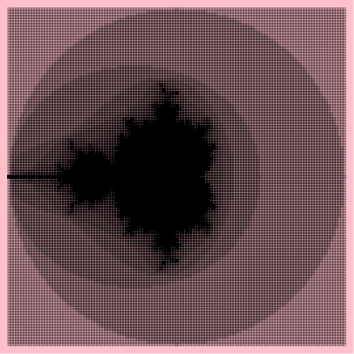

In [18]:
diagram example